In [6]:
import pandas as pd

data_row = pd.read_csv("/Users/withmocha/Desktop/DATA/Capston Design(2024)/data(sentence)/0518(final)/train/augmentaion/train_data_after_vector(test_2).csv", index_col=0)

data_row

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,predict
17694,0.227961,0.035031,-0.698857,0.911117,-0.481734,-0.415996,-1.109473,0.418259,-0.472229,-0.054876,...,0.581952,0.079497,0.164910,-0.730500,-0.443631,0.315034,-0.321170,-0.632769,-0.153295,1
13341,-0.595165,1.166602,-0.900516,1.355391,-0.365639,0.847180,0.129341,1.025414,0.734985,-0.432675,...,1.045196,0.257811,1.153345,-0.268066,-0.018256,1.031780,-0.316261,-0.310365,-0.212927,0
9202,0.267109,-0.230273,-0.528721,0.699076,-0.351816,0.037482,-0.661701,0.427222,-0.160339,-0.493513,...,1.173883,0.913829,0.782222,-0.612495,-0.831150,0.516225,-0.183680,-0.160738,0.029929,1
3736,0.149244,0.831536,-0.349937,1.152719,-0.023488,-0.583639,0.887772,1.207609,0.565668,-0.586011,...,-0.270743,0.077054,0.940413,-0.329218,0.721628,0.372187,0.574617,-0.293561,1.035589,1
18613,0.360023,-0.661589,0.263586,0.675228,-0.037548,-0.442957,0.765267,0.506450,0.133153,-0.914379,...,0.615526,0.853449,1.063447,-0.566079,0.404714,0.778212,0.390136,0.063135,0.043886,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18732,-0.275260,0.812833,0.613078,1.352959,-0.368304,1.094425,-1.475334,-0.637537,-0.416891,0.077902,...,0.473180,-0.156431,0.868269,-0.502300,-0.318061,-0.509680,0.030952,-1.165511,0.882010,0
7659,0.351925,0.328193,0.365044,0.794193,0.266955,-0.528639,0.705818,0.006612,0.856685,0.146860,...,0.292768,1.344640,0.264202,1.841577,-1.081238,1.401208,-0.458901,-0.198107,0.583199,0
26884,0.839306,-0.133832,-0.315700,0.529370,-1.319624,0.180629,0.072482,0.360316,-0.367312,-0.506041,...,0.733759,0.296107,0.166862,-0.301956,0.383881,0.471470,-0.212681,-0.388485,0.339087,1
15483,0.541905,0.496568,-0.110897,2.155164,0.085693,-0.335086,-0.590653,1.388749,0.018946,-0.295322,...,0.727349,-0.836788,-0.401241,0.506032,-1.095022,0.761836,-0.206182,0.173504,0.100087,0


In [7]:

import torch
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")
device = torch.device("mps")  # MPS 장치 사용

tensor([1.], device='mps:0')


In [8]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [9]:
# 데이터 불러오기 및 전처리
data_row = pd.read_csv("/Users/withmocha/Desktop/DATA/Capston Design(2024)/data(sentence)/0518(final)/train/augmentaion/train_data_after_vector(test_2).csv", index_col=0)
y_train = pd.get_dummies(data_row['predict']).values
X_train = data_row.drop(columns=['predict']).values

test = pd.read_csv("/Users/withmocha/Desktop/DATA/Capston Design(2024)/data(sentence)/0518(final)/test/augmentation/test_data_after_vector(test2).csv", index_col=0)
test_y = pd.get_dummies(test['predict']).values
test_x = test.drop(columns=['predict']).values

In [10]:
X_train.shape

(30354, 768)

In [11]:

X_train = torch.tensor(X_train, dtype=torch.float).unsqueeze(1)
y_train = torch.tensor(y_train, dtype=torch.float)
test_x = torch.tensor(test_x, dtype=torch.float).unsqueeze(1)
test_y = torch.tensor(test_y, dtype=torch.float)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(test_x.shape)
print(test_y.shape)

torch.Size([30354, 1, 768])
torch.Size([30354, 2])
torch.Size([3000, 1, 768])
torch.Size([3000, 2])


In [13]:

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=40, shuffle=True)

test_dataset = TensorDataset(test_x, test_y)
test_loader = DataLoader(test_dataset, shuffle=False)

In [14]:
class TextClassifier(nn.Module):
    def __init__(self):
        super(TextClassifier, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=X_train.shape[2], out_channels=128, kernel_size=1)  
        self.conv2 = nn.Conv1d(in_channels=128, out_channels=64, kernel_size=1)
        self.conv3 = nn.Conv1d(in_channels=64, out_channels=32, kernel_size=1)
        self.pool = nn.MaxPool1d(kernel_size=1)
        self.dropout = nn.Dropout(0.5)
        self.lstm = nn.LSTM(input_size=32, hidden_size=128, num_layers=2, batch_first=True, bidirectional=True)
        self.fc1 = nn.Linear(128*2, 32)
        self.fc2 = nn.Linear(32, 2)
        self.activation = nn.ELU()

    def forward(self, x):
        x = self.activation(self.conv1(x))
        x = self.activation(self.conv2(x))
        x = self.activation(self.conv3(x))
        x = self.pool(x)
        x = self.dropout(x)
        x = x.permute(0, 2, 1)  
        x, _ = self.lstm(x)
        x = self.dropout(x[:, -1, :])  
        x = self.activation(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


model = TextClassifier()
model.to(device)

TextClassifier(
  (conv1): Conv1d(1, 128, kernel_size=(1,), stride=(1,))
  (conv2): Conv1d(128, 64, kernel_size=(1,), stride=(1,))
  (conv3): Conv1d(64, 32, kernel_size=(1,), stride=(1,))
  (pool): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.5, inplace=False)
  (lstm): LSTM(32, 128, num_layers=2, batch_first=True, bidirectional=True)
  (fc1): Linear(in_features=256, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=2, bias=True)
  (activation): ELU(alpha=1.0)
)

In [15]:
from torch.optim.lr_scheduler import StepLR


criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.003,weight_decay=1e-5)
scheduler = StepLR(optimizer, step_size=30, gamma=0.1)

In [16]:
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt


In [17]:
num_epochs = 15
training_losses = []
validation_losses = []


patience = 20  
counter = 0  
best_loss = None  

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # 데이터를 MPS 장치로 이동
        inputs = inputs.permute(0, 2, 1)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.float())
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
    
    avg_train_loss = train_loss / len(train_loader)
    training_losses.append(avg_train_loss)
    
   
    model.eval()
    validation_loss = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device) 
            inputs = inputs.permute(0, 2, 1)  
            outputs = model(inputs)
            loss = criterion(outputs, labels.float())
            validation_loss += loss.item()
    
    avg_validation_loss = validation_loss / len(test_loader)
    validation_losses.append(avg_validation_loss)

    print(f'Epoch {epoch+1}, Training Loss: {avg_train_loss}, Validation Loss: {avg_validation_loss}')
    
    scheduler.step()
    
    if best_loss is None:
        best_loss = avg_validation_loss
    elif avg_validation_loss < best_loss:
        best_loss = avg_validation_loss
        counter = 0  
    else:
        counter += 1  
        if counter >= patience:  
            print("Early stopping!")
            break

print('Test Fine End')



RuntimeError: Given groups=1, weight of size [128, 1, 1], expected input[40, 768, 1] to have 1 channels, but got 768 channels instead

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import numpy as np
from itertools import cycle
import matplotlib.pyplot as plt
import numpy as np



torch.save(model.state_dict(), 'detection model 0520.pt')

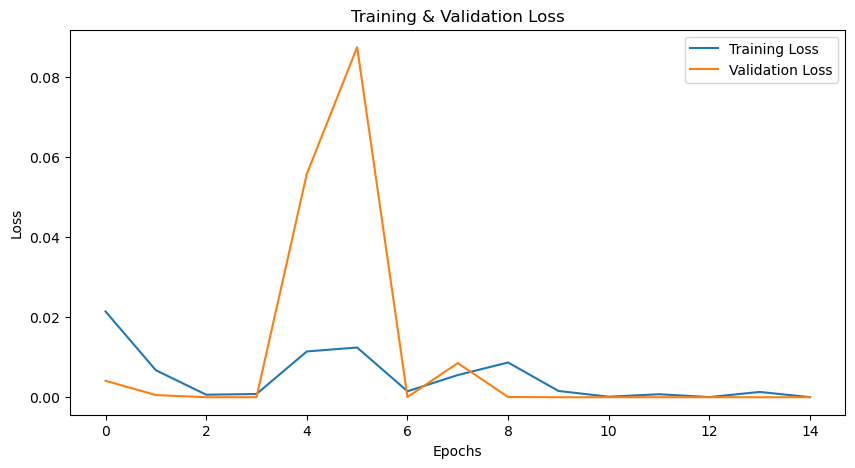

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(training_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

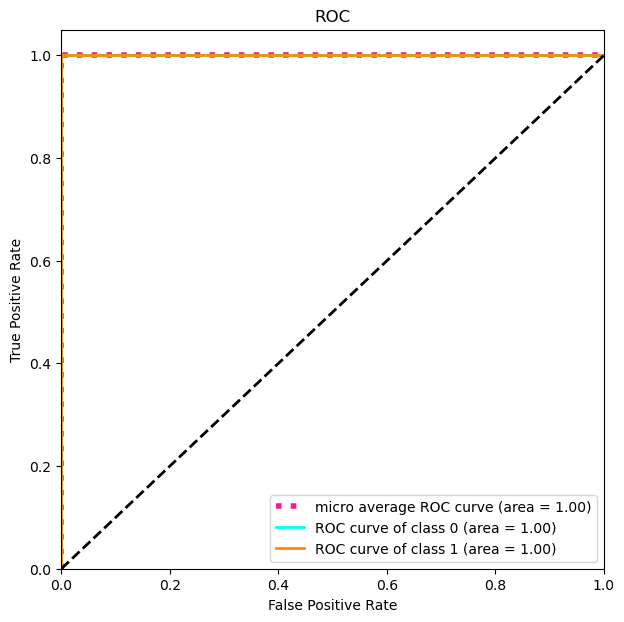

In [ ]:

def plot_multiclass_roc_curve(test_y, y_score, n_classes):
   
    test_y_bin = label_binarize(test_y, classes=[*range(n_classes)])

    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(test_y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

   
    fpr["micro"], tpr["micro"], _ = roc_curve(test_y_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

   
    plt.figure(figsize=(7, 7))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()





from sklearn.preprocessing import label_binarize

test_x = test_x.permute(0, 2, 1)  
y_score = model(test_x).detach().cpu().numpy()

test_y = test_y.detach().cpu().numpy()

plot_multiclass_roc_curve(test_y, y_score, n_classes=2)

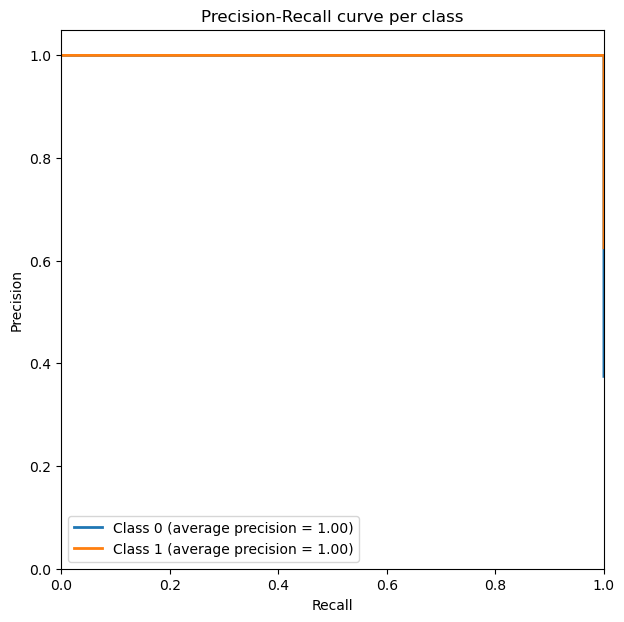

In [ ]:
def plot_precision_recall_curve(test_y, y_score, n_classes):
    
    test_y = label_binarize(test_y, classes=[*range(n_classes)])
    
   
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(test_y[:, i], y_score[:, i])
        average_precision[i] = average_precision_score(test_y[:, i], y_score[:, i])

    
    plt.figure(figsize=(7, 7))
    for i in range(n_classes):
        plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (average precision = {average_precision[i]:0.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve per class')
    plt.legend(loc="best")
    plt.show()
    
plot_precision_recall_curve(test_y, y_score, n_classes=2)

In [ ]:

y_pred = np.argmax(y_score, axis=1)
test_y_labels = np.argmax(test_y, axis=1)  

In [ ]:

accuracy = accuracy_score(test_y_labels, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [ ]:
# 혼동 행렬
conf_matrix = confusion_matrix(test_y_labels, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[1124    0]
 [   0 1876]]


In [ ]:
with open("CNN BILSTM confusion matrix.txt", "w") as text_file:
    print(confusion_matrix(test_y_labels, y_pred), file=text_file)

In [ ]:
# 분류 보고서
class_report = classification_report(test_y_labels, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1124
           1       1.00      1.00      1.00      1876

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [ ]:
with open("CNN-BILSTM output.txt", "w") as text_file:
    print(classification_report(test_y_labels, y_pred,digits=4), file=text_file)